In [21]:
from gensim.models import Word2Vec
from gensim.models import FastText
from glove import Corpus, Glove
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
import numpy as np

In [22]:
data = [
    "word embeddings are fascinating",
    "word2vec captures semantic relationships",
    "GloVe considers global context",
    "FastText extends Word2Vec with subword information"
]

# `Function to train Word2Vec model`

In [23]:

def train_word2vec(data):
    model = Word2Vec([sentence.split() for sentence in data], vector_size=100, window=5, min_count=1, workers=4)
    return model

# `Function to train GloVe model`


In [24]:
def train_glove(data):
    # Tokenize the data before fitting to the Corpus
    tokenized_data = [nltk.word_tokenize(sentence) for sentence in data]
    corpus = Corpus()
    corpus.fit(tokenized_data, window=5)  # Pass tokenized data to fit
    glove = Glove(no_components=100, learning_rate=0.05)
    glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)

    # Build the dictionary explicitly after fitting the model
    glove.add_dictionary(corpus.dictionary)

    return glove

# `Function to train FastText model`


In [25]:
def train_fasttext(data):
    model = FastText(sentences=[sentence.split() for sentence in data], vector_size=100, window=5, min_count=1, workers=4)
    return model

In [26]:
def plot_embeddings(model, title):
    if isinstance(model, Glove):
        labels = list(model.dictionary.keys())
        vectors = [model.word_vectors[model.dictionary[word]] for word in labels]
    else:
        labels = model.wv.index_to_key
        vectors = [model.wv[word] for word in labels]

    vectors = np.array(vectors)

    perplexity_value = min(40, len(vectors) - 1)

    tsne_model = TSNE(perplexity=perplexity_value, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vectors)

    x, y = [], []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(10, 8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title(title)
    plt.show()


# `Train models`

In [27]:
word2vec_model = train_word2vec(data)
glove_model = train_glove(data)
fasttext_model = train_fasttext(data)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


# `Plot embeddings`


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


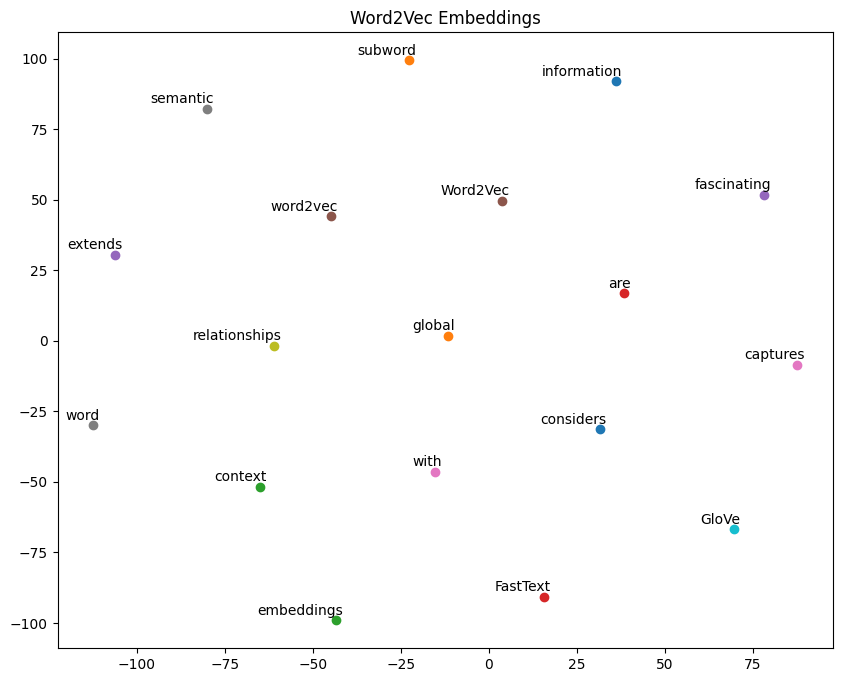

In [28]:
plot_embeddings(word2vec_model, 'Word2Vec Embeddings')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


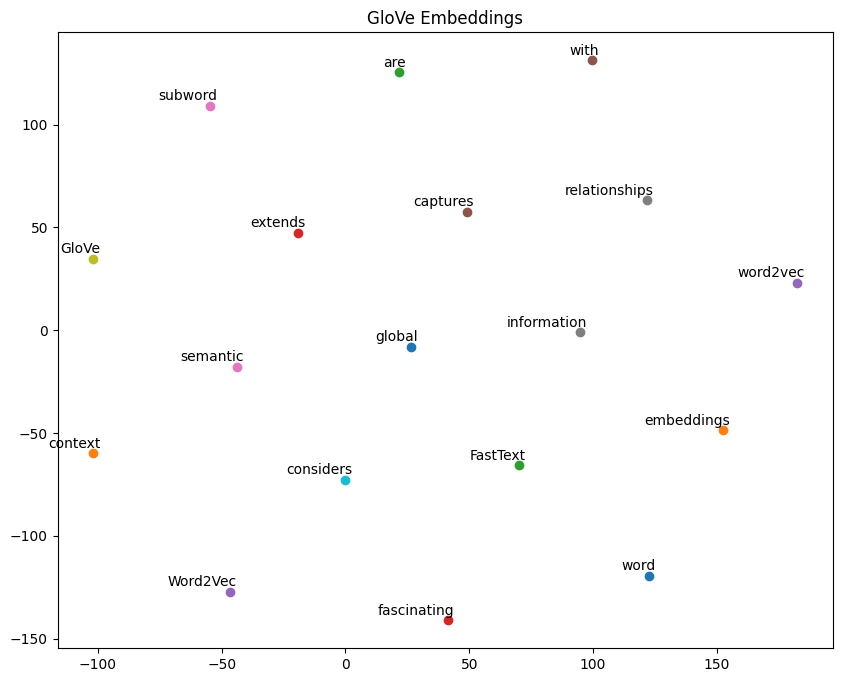

In [29]:
plot_embeddings(glove_model, 'GloVe Embeddings')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


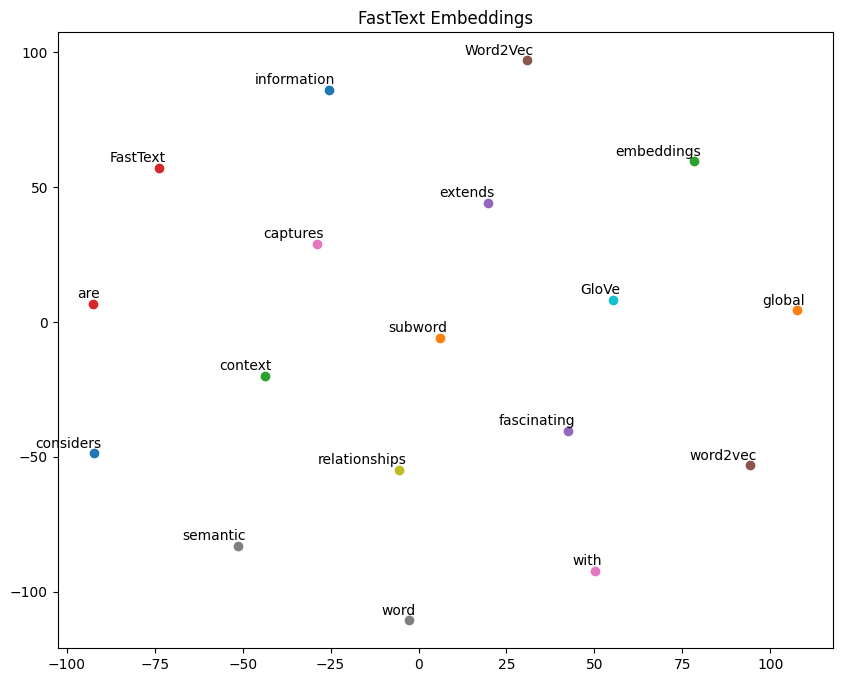

In [30]:
plot_embeddings(fasttext_model, 'FastText Embeddings')